In [337]:
# importing the Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [338]:
# supress warnings
import warnings
warnings.filterwarnings("ignore")

In [339]:
# importing the library for models
from sklearn.model_selection import train_test_split  # for train_test split
from sklearn.preprocessing import MinMaxScaler        # for rescaling the numerical variable before modelling

from sklearn.feature_selection import RFE            # Building the model using RFE
from sklearn.linear_model import LinearRegression    # Building the model using RFE

from sklearn.metrics import r2_score                 # importing r2 for the test data set validation


import statsmodels.api as sm                         #  Adding a constant variable ,Creating the first model, model summary
from statsmodels.stats.outliers_influence import variance_inflation_factor  # to Check for the VIF values of the feature variables

# Step 1: Reading and understanding the data

In [340]:
df = pd.read_csv(r"C:\Users\abhik.gupta\Documents\MS in Data Science - IIIT B\Course2 - Machine Learning-1\Credit_CaseStudy_LinerarRegression_Bikes\day.csv")

In [341]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [342]:
df.shape

(730, 16)

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [344]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Takeaways

- one object type and other all int/float
- dteday has data type as object
- Few columns looks like categorical,but are in format of int/float

# Step 2: Data Qulaity Check 

## 2.1 Missing Values

In [345]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### 2.2 Check for Duplicates

In [346]:
# Copying the dataframe into new df1
df1 = df.copy()

In [347]:
# checking the shape of new dataframe
df1.shape

(730, 16)

In [348]:
# dropping the duplicates

df1.drop_duplicates(inplace=True)

In [349]:
# re-verifying the shape of new dataframe

df1.shape

(730, 16)

In [350]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Shape is same after removing duplicates hence there are no Duplicates in original DataFrame as well

In [351]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column

df.drop(["instant", "dteday", "casual", "registered"], axis=1, inplace=True )

In [352]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [353]:
# renaming col for better readability

df.rename(columns={"yr":"year", "mnth":"month", "hum":"humidity"} , inplace=True)

In [354]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [355]:
# mapping/encoding the season column

df["season"] = df.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

In [356]:
#verify that values have been mapped successfully
df.season.value_counts(ascending=False)

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [357]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [358]:
# mapping/encoding the month column

df["month"] = df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [359]:
# mapping/encoding the weekday column

df["weekday"] = df.weekday.map({0:"Sun", 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat"})

In [360]:
# mapping/encoding the weathersit column

df["weathersit"] = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [361]:
#verify that valyes have been mapped successfully
df.weathersit.value_counts()

Clear             463
Misty             246
Light_snowrain     21
Name: weathersit, dtype: int64

In [362]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Step3 : Data Visualisation

#### Steps
- create Box plot for category column with cnt variable
- create barplot for category column with cnt variable
- create pairplot for numeric varable
- create heatmap for numeric variable

In [ ]:
#getting a list of categorical columns

# cat_cols= Lead_data.select_dtypes(include=['object']).columns
# cat_cols

In [363]:
# segregating the column
category_column = ['season','year','month','holiday', 'weekday','workingday','weathersit']
numerical_column = ['temp', 'atemp' , 'humidity' , 'windspeed']

In [364]:
# Altrenative
# plt.figure(figsize=(20, 12))
# plt.subplot(2,4,1)
# sns.boxplot(x = 'season', y = 'cnt', data = df)
# plt.subplot(2,4,2)
# sns.boxplot(x = 'month', y = 'cnt', data = df)
# plt.subplot(2,4,3)
# sns.boxplot(x = 'weekday', y = 'cnt', data = df)
# plt.subplot(2,4,4)
# sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
# plt.subplot(2,4,5)
# sns.boxplot(x = 'holiday', y = 'cnt', data = df)
# plt.subplot(2,4,6)
# sns.boxplot(x = 'workingday', y = 'cnt', data = df)
# plt.subplot(2,4,7)
# sns.boxplot(x = 'year', y = 'cnt', data = df)
# plt.show()

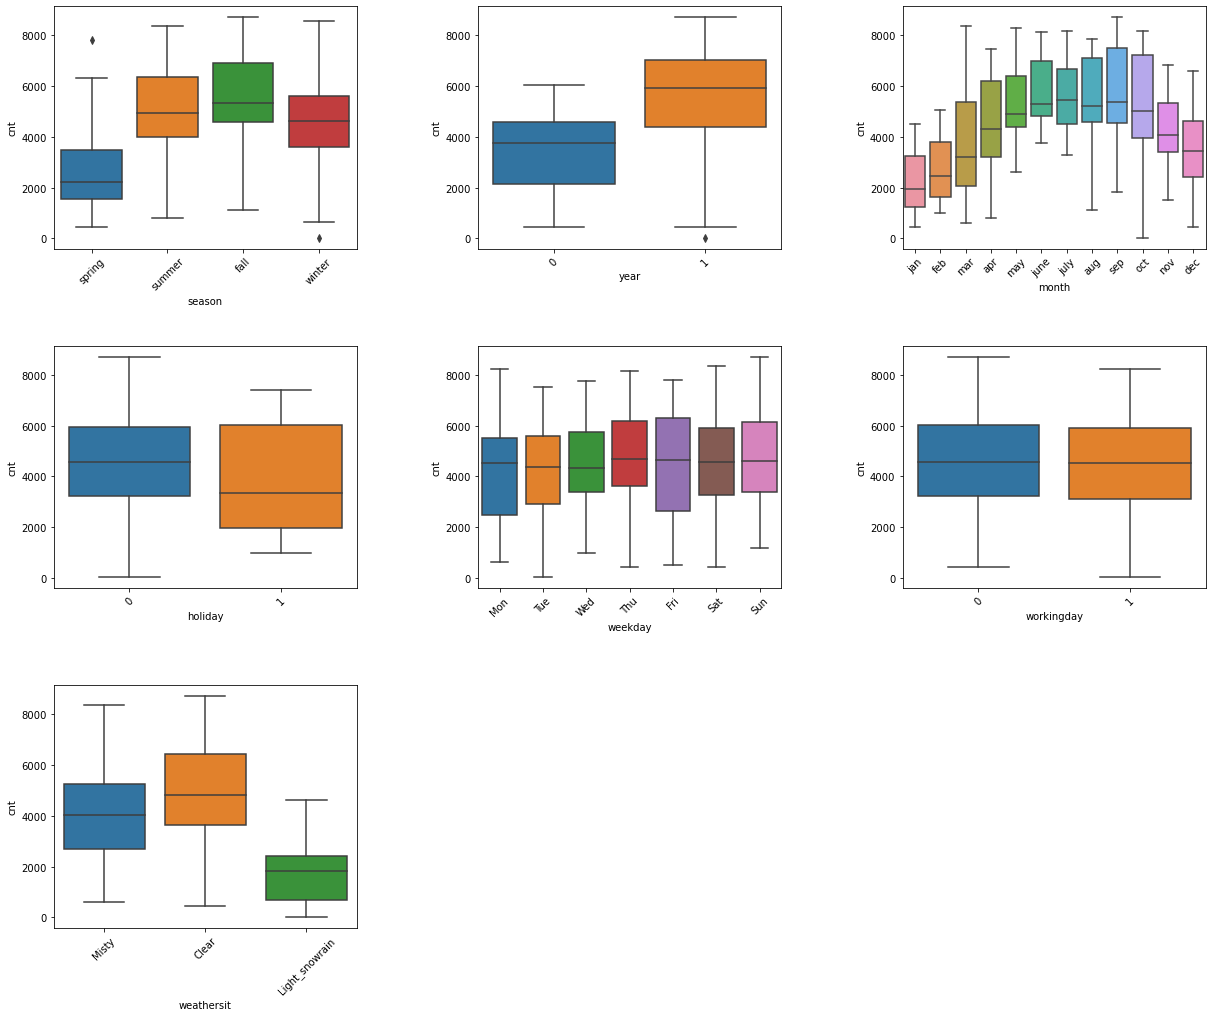

In [365]:
# For the categorical column we can create Box plot w.r.t to CNT
# Looping the category_column to create the box plot and using the For loop make a code efficient and simplier

plt.figure(figsize=(20,16))
for i,j in enumerate(category_column):                             
    plt.subplot(3,3,i+1)
    sns.boxplot(x = j, y = "cnt", data = df)
    plt.xticks(rotation='45')
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

## Takeaways

- Target varaible cnt is high in summer and fall season
- Cnt is more in 2019 as compared to 2018
- Cnt is more in is more in month june to october
- People prefer to rent bike when the sky is clear or few clouds

In [366]:
# function to create barplot related to categorical columns

def bar_categorical(column):
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    sns.barplot(column, 'cnt', data=df)
    
    plt.subplot(1,2,2)
    sns.barplot(column, 'cnt', data=df, hue='year', palette='Set1')
    plt.legend(labels=['2018', '2019'], labelcolor = ['darkred','blue'])
    plt.show()

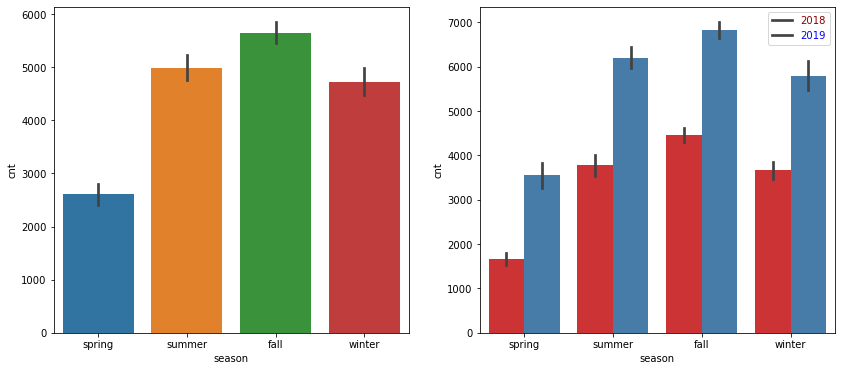

In [367]:
bar_categorical('season')

- Fall season seems to have attracted more booking. And, in each season the booking count has increased drastically from 2018 to 2019.

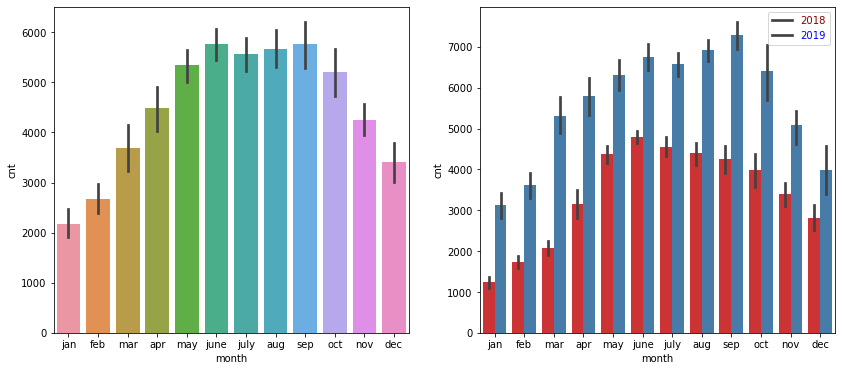

In [368]:
# plotting visualization for month column

bar_categorical('month')

## Takeaways

- Most of the bookings has been done during the month of may, june, july, aug, sep and oct
- Trend increased starting of the year till mid of the year and then it started decreasing as we approached the end of year
- Number of booking for each month seems to have increased from 2018 to 2019

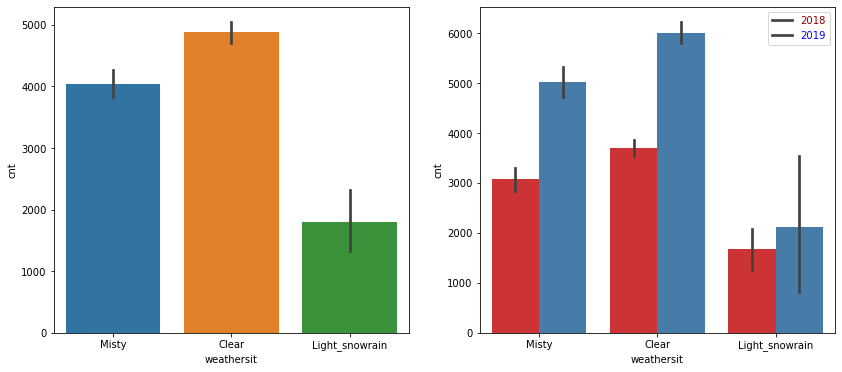

In [369]:
# plotting visualization for weathersit column

bar_categorical('weathersit')

- Clear weather attracted more booking which seems obvious. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

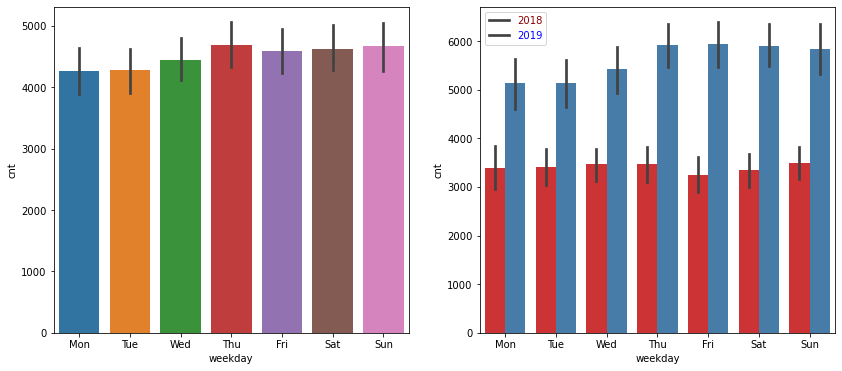

In [370]:
# plotting visualization for weekday column

bar_categorical('weekday')

- Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.
- User cnt has increased in 2019 drastically

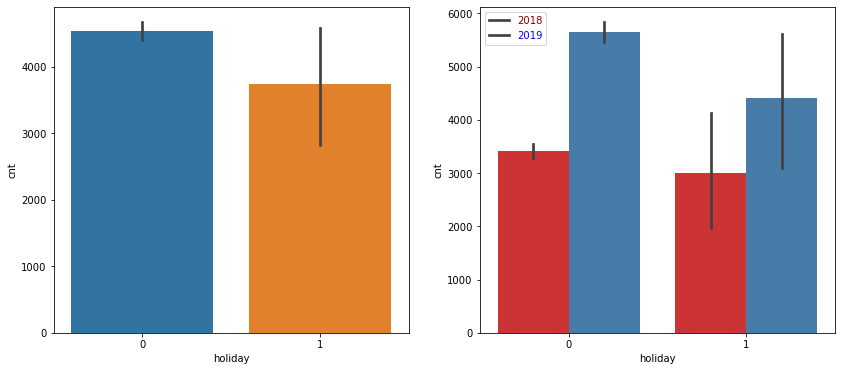

In [371]:
# plotting visualization for holiday column

bar_categorical('holiday')

- More people prefer to rent bike on working days and during holiday people prefer to stay home.

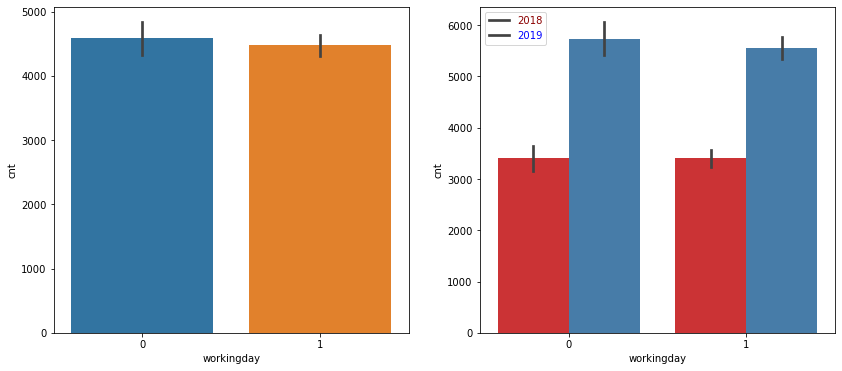

In [372]:
# plotting visualization for workingday column

bar_categorical('workingday')

- Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

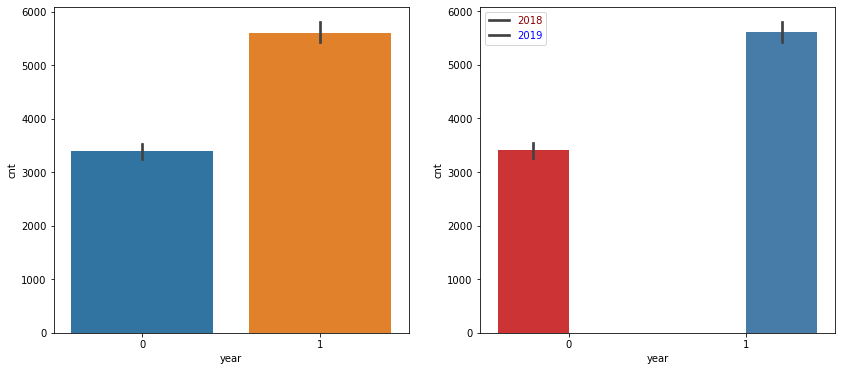

In [373]:
# plotting visualization for year column

bar_categorical('year')

- 2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

## Analysing Numerical Variables

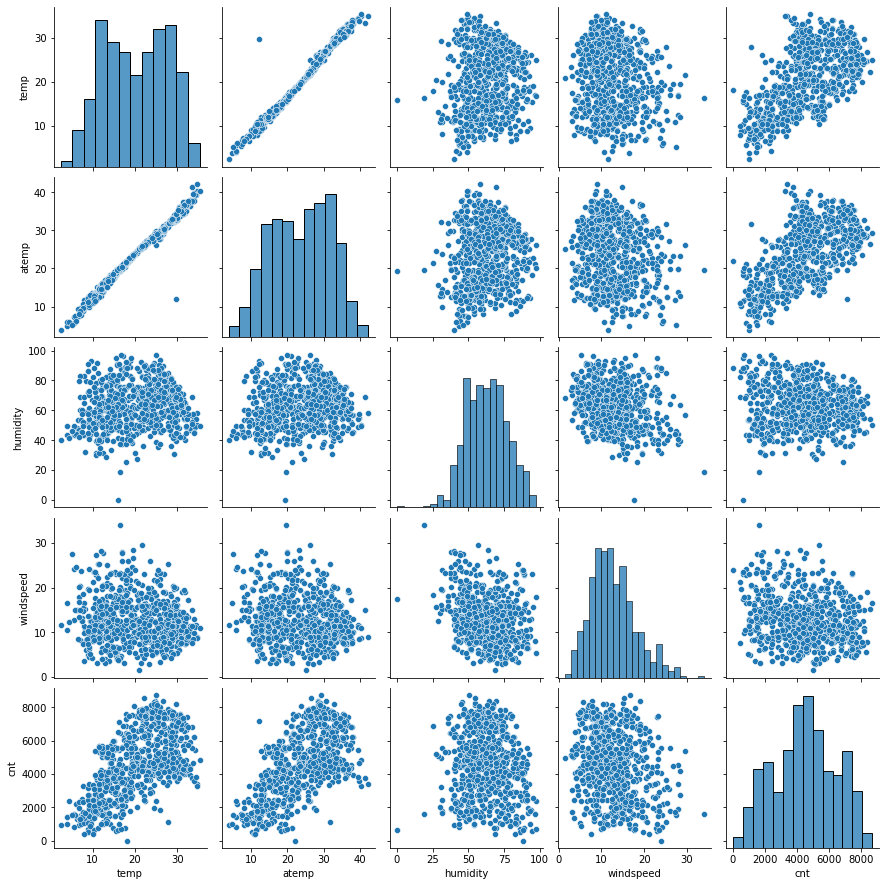

In [374]:
# ploting pair plot for numerical variables

sns.pairplot(data=df , vars= ['temp', 'atemp', 'humidity', 'windspeed', 'cnt'])
plt.show()

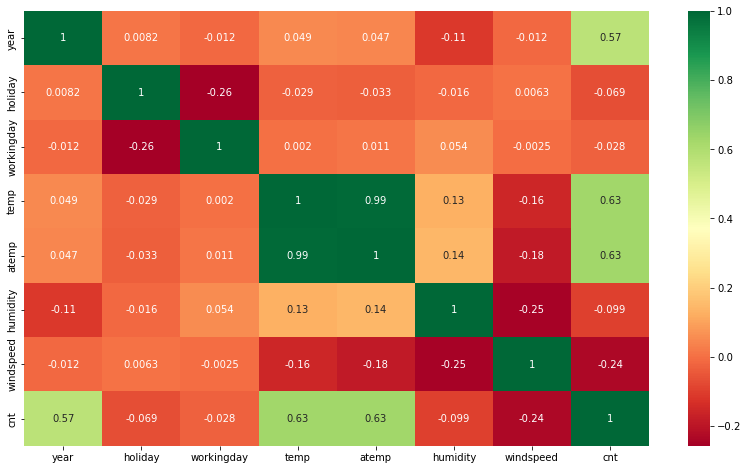

In [375]:
#plotiing thr heat map for checking corelation

plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")
plt.show()

- There is high correaltion between temp and atemp and further lead to multicollinearity 
- We will decide which feature to be kept based on Variance Inflation Factor(VIF) and p-value w.r.t other variables

# Step 4 : Data Preparation

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [377]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [378]:
df_season = pd.get_dummies(df.season, drop_first=True)
df_month = pd.get_dummies(df.month, drop_first=True)
df_weekday = pd.get_dummies(df.weekday, drop_first=True)
df_weathersit = pd.get_dummies(df.weathersit, drop_first=True)

In [379]:
print(df_season.head())
print(df_month.head())
print(df_weekday.head())
print(df_weathersit.head())

   spring  summer  winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0
   aug  dec  feb  jan  july  june  mar  may  nov  oct  sep
0    0    0    0    1     0     0    0    0    0    0    0
1    0    0    0    1     0     0    0    0    0    0    0
2    0    0    0    1     0     0    0    0    0    0    0
3    0    0    0    1     0     0    0    0    0    0    0
4    0    0    0    1     0     0    0    0    0    0    0
   Mon  Sat  Sun  Thu  Tue  Wed
0    1    0    0    0    0    0
1    0    0    0    0    1    0
2    0    0    0    0    0    1
3    0    0    0    1    0    0
4    0    0    0    0    0    0
   Light_snowrain  Misty
0               0      1
1               0      1
2               0      0
3               0      0
4               0      0


In [380]:
# concating all the dataframe to the original data

df = pd.concat([df, df_season,df_month,df_weekday,df_weathersit], axis=1)
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,oct,sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty
0,spring,0,jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [381]:
# Dropping season, month, weekday, weathersit columns as we have already created dummy variable out of it.

df = df.drop(['season','month','weekday','weathersit'], axis=1)

df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [382]:
# check the shape of new dataframe
df.shape

(730, 30)

In [383]:
# check the column info of new dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   spring          730 non-null    uint8  
 9   summer          730 non-null    uint8  
 10  winter          730 non-null    uint8  
 11  aug             730 non-null    uint8  
 12  dec             730 non-null    uint8  
 13  feb             730 non-null    uint8  
 14  jan             730 non-null    uint8  
 15  july            730 non-null    uint8  
 16  june            730 non-null    uint8  
 17  mar             730 non-null    uin

# Step 5 : Splitting the Data into Training and Testing Sets

In [384]:
# splitting the dataframe into test and train

# we need same row for test and train data respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [385]:
# check the shape of training datatset

df_train.shape

(510, 30)

In [386]:
# check the shape of test datatset

df_test.shape

(220, 30)

In [387]:
# Using MinMaxScaler to Rescaling the features(numerical variables)

scaler = MinMaxScaler()

In [388]:
# verifying the head of training dataset before scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,1,0,0,0,0,1


In [389]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [390]:
# verifying the head after appying scaling.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


In [391]:
# describing the dataset

df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


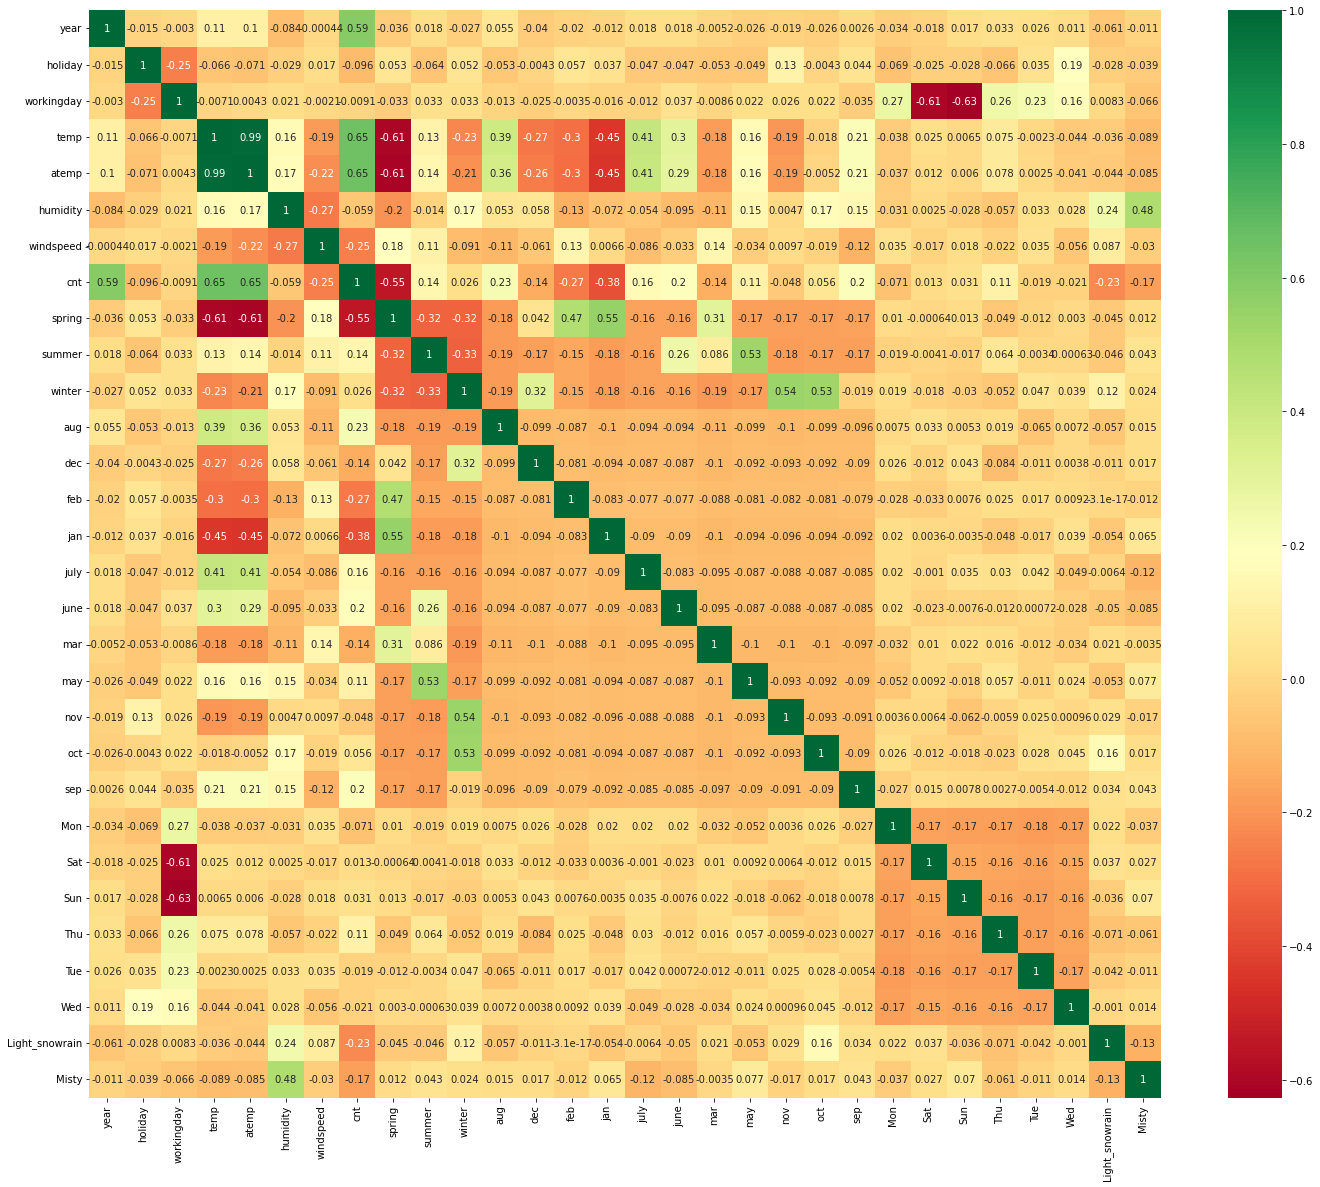

In [392]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize=(24,20))
sns.heatmap(df_train.corr(), annot=True, cmap='RdYlGn' )
plt.show()

- CNT target variable shows good corelation with temp, atemp , year. While there is a good negative corelation with spring also
- CNT target variable have weak -ve correlation b/w Feb, Jan & Light_snowrain

In [393]:
# Create seperate dataset for dependant(y_train) and in-dependant(X_train) variables

y_train = df_train.pop('cnt')
X_train = df_train

In [394]:
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,spring,summer,winter,...,oct,sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [395]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

## Selecting top 15 variables using RFE method

In [396]:
# Recursive feature elimination (RFE) for feature elimination

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [397]:
# List of variables selected in top 15 list and zipping the columns name with ranking 

list(zip(X_train.columns, rfe.support_ , rfe.ranking_ ))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 15),
 ('may', False, 9),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 5),
 ('Sun', False, 6),
 ('Thu', False, 14),
 ('Tue', False, 7),
 ('Wed', False, 11),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1)]

In [398]:
# identify the columns retained by RFE
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'july', 'nov', 'sep', 'Light_snowrain',
       'Misty'],
      dtype='object')

In [399]:
# find out columns that have been removed
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'Mon',
       'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

# Step 6: Building the Linear Model

In [400]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col]
X_train_rfe.head()

,year,holiday,temp,humidity,windspeed,spring,summer,winter,dec,jan,july,nov,sep,Light_snowrain,Misty
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1


In [401]:
# Adding a constant variable 

X_train_rfe_lm_1 = sm.add_constant(X_train_rfe)

In [402]:
#Creating the 'first' linear regression model 
lm_1 = sm.OLS(y_train, X_train_rfe_lm_1).fit()     # Running the linear model

In [403]:
#check summary of the model
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 19 Sep 2022   Prob (F-statistic):          8.15e-189
Time:                        21:42:06   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3197      0.036      8.859      0.000       0.249       0.391
year               0.2304      0.008     28.487      0.000       0.215       0.246
holiday           -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp               0.4815      0.037     13.005      0.000       0.409       0.554
humidity          -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed         -0.1887      0.026     -7.315      0.000      -0.239      -0.138
spring            -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer             0.0423      0.015      2.761      0.006       0.012       0.072
winter             0.1019      0.018      5.656      0.000       0.067       0.137
dec               -0.0355      0.018     -2.024      0.043      -0.070      -0.001
jan               -0.0434      0.018     -2.393      0.017      -0.079      -0.008
july              -0.0553      0.018     -3.030      0.003      -0.091      -0.019
nov               -0.0387      0.019     -2.057      0.040      -0.076      -0.002
sep                0.0755      0.017      4.466      0.000       0.042       0.109
Light_snowrain    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Misty             -0.0543      0.010     -5.194      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [404]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
# vif
vif['VIF'] = [ variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1]) ]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Features,VIF
3,humidity,30.89
2,temp,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
14,Misty,2.32
0,year,2.09
11,nov,1.85
9,jan,1.75


In [405]:
# As humidity shows very high VIF values hence we can drop it

X_train_rfe.drop(['humidity'], axis=1, inplace=True)

### Building a second model 

In [406]:
# Adding a constant variable 

X_train_rfe_lm_2 = sm.add_constant(X_train_rfe)

In [407]:
#Creating the 'second' linear regression model 
lm_2 = sm.OLS(y_train, X_train_rfe_lm_2).fit()

In [408]:
#check summary of the model
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 19 Sep 2022   Prob (F-statistic):          4.75e-186
Time:                        21:42:06   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2450      0.032      7.618      0.000       0.182       0.308
year               0.2345      0.008     28.687      0.000       0.218       0.251
holiday           -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp               0.4387      0.036     12.093      0.000       0.367       0.510
windspeed         -0.1585      0.025     -6.276      0.000      -0.208      -0.109
spring            -0.0713      0.021     -3.314      0.001      -0.113      -0.029
summer             0.0349      0.015      2.251      0.025       0.004       0.065
winter             0.0869      0.018      4.831      0.000       0.052       0.122
dec               -0.0428      0.018     -2.413      0.016      -0.078      -0.008
jan               -0.0500      0.018     -2.719      0.007      -0.086      -0.014
july              -0.0500      0.019     -2.703      0.007      -0.086      -0.014
nov               -0.0395      0.019     -2.064      0.040      -0.077      -0.002
sep                0.0687      0.017      4.015      0.000       0.035       0.102
Light_snowrain    -0.2917      0.025    -11.840      0.000      -0.340      -0.243
Misty             -0.0801      0.009     -9.198      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [409]:
# Generic function to calculate VIF of variables

def calculate_VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [410]:
# calculating the VIF
calculate_VIF(X_train_rfe)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.95
4,spring,2.89
5,summer,2.24
0,year,2.07
10,nov,1.81
8,jan,1.66
9,july,1.59
13,Misty,1.57


- VIF values seems to be good now. But we will see if we can reduce further ?

In [411]:
# We can drop nov variable as it has high p-value

X_train_rfe = X_train_rfe.drop(['nov'], axis=1)

In [412]:
# Run the function to calculate VIF for the new model
calculate_VIF(X_train_rfe)

,Features,VIF
2,temp,5.14
3,windspeed,4.62
4,spring,2.89
5,summer,2.24
0,year,2.07
6,winter,2.05
8,jan,1.65
9,july,1.59
12,Misty,1.57
10,sep,1.34


- VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.

### Building a third model 

In [413]:
# Adding a constant variable 

X_train_rfe_lm_3 = sm.add_constant(X_train_rfe)

In [414]:
#Creating the 'Third' linear regression model 
lm_3 = sm.OLS(y_train, X_train_rfe_lm_3).fit()

In [415]:
#check summary of the model
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 19 Sep 2022   Prob (F-statistic):          2.74e-186
Time:                        21:42:07   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2283      0.031      7.310      0.000       0.167       0.290
year               0.2343      0.008     28.573      0.000       0.218       0.250
holiday           -0.0982      0.026     -3.783      0.000      -0.149      -0.047
temp               0.4581      0.035     13.031      0.000       0.389       0.527
windspeed         -0.1594      0.025     -6.291      0.000      -0.209      -0.110
spring            -0.0632      0.021     -2.979      0.003      -0.105      -0.022
summer             0.0404      0.015      2.635      0.009       0.010       0.070
winter             0.0774      0.017      4.438      0.000       0.043       0.112
dec               -0.0283      0.016     -1.731      0.084      -0.060       0.004
jan               -0.0451      0.018     -2.467      0.014      -0.081      -0.009
july              -0.0499      0.019     -2.686      0.007      -0.086      -0.013
sep                0.0742      0.017      4.373      0.000       0.041       0.108
Light_snowrain    -0.2878      0.025    -11.677      0.000      -0.336      -0.239
Misty             -0.0793      0.009     -9.089      0.000      -0.096      -0.062
==============================================================================
Omnibus:                       62.961   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.773
Skew:                          -0.660   Prob(JB):                     2.22e-32
Kurtosis:                       5.263   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [416]:
# We can drop dec variable as it has high p-value

X_train_rfe = X_train_rfe.drop(['dec'], axis=1)

In [417]:
# Run the function to calculate VIF for the new model
calculate_VIF(X_train_rfe)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
4,spring,2.75
5,summer,2.24
0,year,2.07
6,winter,1.78
7,jan,1.61
8,july,1.59
11,Misty,1.56
9,sep,1.34


### Building a fourth model 

In [418]:
# Adding a constant variable 

X_train_rfe_lm_4 = sm.add_constant(X_train_rfe)

In [419]:
#Creating the 'Third' linear regression model 
lm_4 = sm.OLS(y_train, X_train_rfe_lm_4).fit()

In [420]:
#check summary of the model
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 19 Sep 2022   Prob (F-statistic):          8.14e-187
Time:                        21:42:07   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2154      0.030      7.088      0.000       0.156       0.275
year               0.2343      0.008     28.517      0.000       0.218       0.250
holiday           -0.0968      0.026     -3.722      0.000      -0.148      -0.046
temp               0.4721      0.034     13.772      0.000       0.405       0.539
windspeed         -0.1549      0.025     -6.135      0.000      -0.205      -0.105
spring            -0.0617      0.021     -2.905      0.004      -0.103      -0.020
summer             0.0434      0.015      2.845      0.005       0.013       0.073
winter             0.0757      0.017      4.335      0.000       0.041       0.110
jan               -0.0383      0.018     -2.138      0.033      -0.073      -0.003
july              -0.0503      0.019     -2.706      0.007      -0.087      -0.014
sep                0.0764      0.017      4.506      0.000       0.043       0.110
Light_snowrain    -0.2854      0.025    -11.575      0.000      -0.334      -0.237
Misty             -0.0793      0.009     -9.067      0.000      -0.096      -0.062
==============================================================================
Omnibus:                       59.886   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.021
Skew:                          -0.638   Prob(JB):                     4.79e-30
Kurtosis:                       5.174   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [421]:
# We can drop jan variable as it has high p-value

X_train_rfe = X_train_rfe.drop(['jan'], axis=1)

In [422]:
# Run the function to calculate VIF for the new model
calculate_VIF(X_train_rfe)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.23
4,spring,2.08
0,year,2.07
6,winter,1.78
7,july,1.58
10,Misty,1.55
8,sep,1.34
9,Light_snowrain,1.08


### Building a fifth model 

In [423]:
# Adding a constant variable 

X_train_rfe_lm_5 = sm.add_constant(X_train_rfe)

In [424]:
#Creating the 'Third' linear regression model 
lm_5 = sm.OLS(y_train, X_train_rfe_lm_5).fit()

In [425]:
#check summary of the model
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 19 Sep 2022   Prob (F-statistic):          5.06e-187
Time:                        21:42:07   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1994      0.030      6.746      0.000       0.141       0.258
year               0.2336      0.008     28.352      0.000       0.217       0.250
holiday           -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp               0.4910      0.033     14.770      0.000       0.426       0.556
windspeed         -0.1479      0.025     -5.887      0.000      -0.197      -0.099
spring            -0.0672      0.021     -3.175      0.002      -0.109      -0.026
summer             0.0465      0.015      3.051      0.002       0.017       0.076
winter             0.0817      0.017      4.730      0.000       0.048       0.116
july              -0.0521      0.019     -2.790      0.005      -0.089      -0.015
sep                0.0768      0.017      4.517      0.000       0.043       0.110
Light_snowrain    -0.2842      0.025    -11.487      0.000      -0.333      -0.236
Misty             -0.0802      0.009     -9.146      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [426]:
# We can drop july variable as it has high p-value

X_train_rfe = X_train_rfe.drop(['july'], axis=1)

In [427]:
calculate_VIF(X_train_rfe)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
4,spring,1.99
5,summer,1.90
6,winter,1.63
9,Misty,1.55
7,sep,1.23
8,Light_snowrain,1.08
1,holiday,1.04


- VIF value now seems to be good as it came below 5.

### Building a 'Sixth' model 

In [428]:
# Adding a constant variable 

X_train_rfe_lm_6 = sm.add_constant(X_train_rfe)

In [429]:
#Creating the 'Sixth' linear regression model 

lm_6 = sm.OLS(y_train, X_train_rfe_lm_6).fit()

In [430]:
#check summary of the model
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Mon, 19 Sep 2022   Prob (F-statistic):          1.47e-186
Time:                        21:42:07   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1909      0.030      6.447      0.000       0.133       0.249
year               0.2341      0.008     28.237      0.000       0.218       0.250
holiday           -0.0963      0.026     -3.668      0.000      -0.148      -0.045
temp               0.4777      0.033     14.423      0.000       0.413       0.543
windspeed         -0.1481      0.025     -5.854      0.000      -0.198      -0.098
spring            -0.0554      0.021     -2.654      0.008      -0.096      -0.014
summer             0.0621      0.014      4.350      0.000       0.034       0.090
winter             0.0945      0.017      5.630      0.000       0.062       0.127
sep                0.0910      0.016      5.566      0.000       0.059       0.123
Light_snowrain    -0.2850      0.025    -11.444      0.000      -0.334      -0.236
Misty             -0.0787      0.009     -8.938      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       63.413   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.384
Skew:                          -0.674   Prob(JB):                     1.21e-31
Kurtosis:                       5.210   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- We can cosider the above model i.e lm_6, as it seems to have very low multicolinearity(< 5) between the predictors and the p-values for all the predictors seems to be significant.
- F-Statistics value of 248.4 (which is greater than 1) and the p-value of 1.47e-186 i.e almost equals to zero, states that the overall model is significant

In [431]:
# Checking the parameters and their coefficient values

lm_6.params

const             0.190855
year              0.234132
holiday          -0.096316
temp              0.477737
windspeed        -0.148098
spring           -0.055406
summer            0.062076
winter            0.094476
sep               0.090998
Light_snowrain   -0.285031
Misty            -0.078741
dtype: float64

### According to Hypothesis Testing:
   #### Hypothesis testing states that: Null Hypothesis H0:B1=B2=...=Bn=0 (Here co-efficients will be equal to zero or B(i) is not significant)
   #### Alternate Hyposthesis H1: at least one B(i) != 0 (Atleast one co-efficients will not be equal to Zero)

- From the model-6 (lm_6) summary,
- It is evident that all our coefficients are not equal to zero which means WE REJECT THE NULL HYPOTHESIS

# Step 7 : Residual Analysis of the train data and validation

In [432]:
# calculating the prediction value of y for the lm_6 model

y_train_pred = lm_6.predict(X_train_rfe_lm_6)

### Distribution/Normality of Error Terms

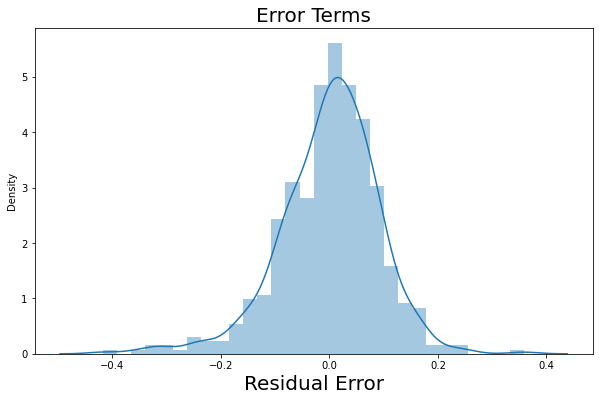

In [433]:
# Plot the histogram of the error terms

plt.figure(figsize=(10,6))
sns.distplot(y_train - y_train_pred, bins=30)
plt.title('Error Terms', fontsize = 20)
plt.xlabel("Residual Error", fontsize = 20)
plt.show()

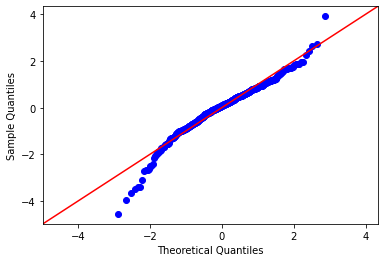

In [434]:
#Q-Q plot to see if errors are normally distributed
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

- Error terms are following Normal Distribution qualitatively

## Homoscedasticity of Model (uniform variance)

- To validate if Error Terms show any pattern or trend. To be called homoscedastic there should be no pattern or trend in error terms 

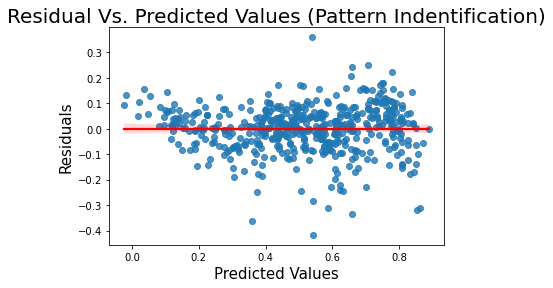

In [435]:
residual = y_train - y_train_pred
sns.regplot(x = y_train_pred , y = residual, line_kws={"color": "red"})
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

## Validating Independence of residuals

- The Durbin-Watson value for Final Model lm_6 is 2.08 which signifies there is no autocorrelation.

- Range of Durbin-Watson value from 1.5 to 2.5 are relatively normal

## Multicolinearity Of Model

In [436]:
calculate_VIF(X_train_rfe)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
4,spring,1.99
5,summer,1.90
6,winter,1.63
9,Misty,1.55
7,sep,1.23
8,Light_snowrain,1.08
1,holiday,1.04


- All the values is less than 5. So the model is having no multi colinearity

## Linearity of Model

In [437]:
df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


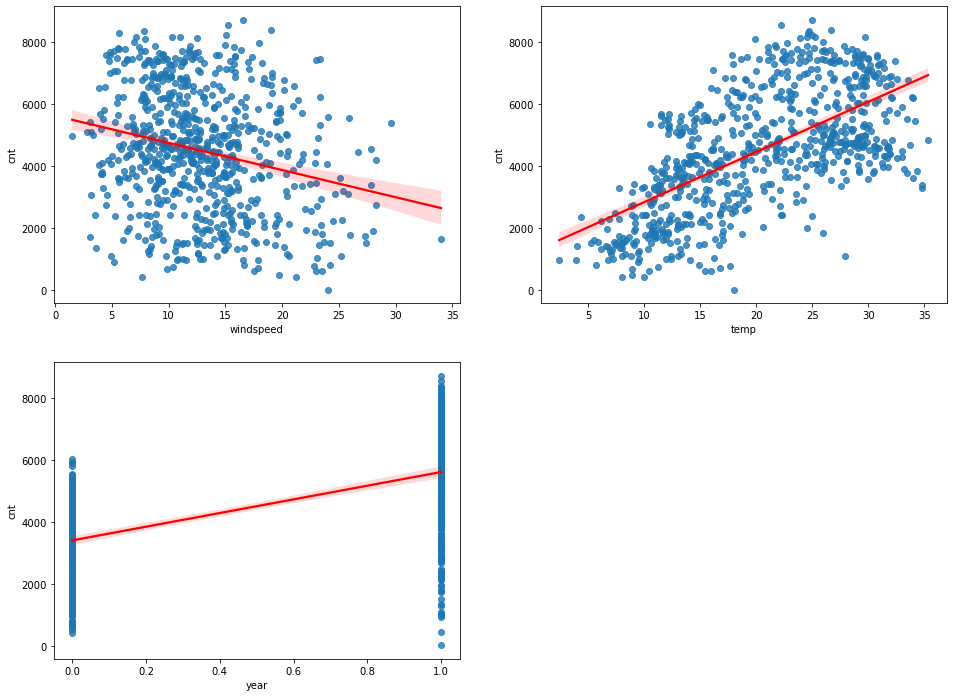

In [438]:
#Visualise the Linear relationship between target variable and continuous features to check for linear relationship

plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
sns.regplot(df.windspeed , df.cnt, line_kws={"color": "red"})
plt.subplot(2,2,2)
sns.regplot(df.temp , df.cnt, line_kws={"color": "red"})
plt.subplot(2,2,3)
sns.regplot(df.year , df.cnt, line_kws={"color": "red"})
plt.show()

## Step 8: Making Predictions On "Test Data Set" Using the "Final Model " (lm_6)

- Now that we have fitted the model and checked the normality of error terms, now lets make predictions using the final model, i.e. 6th model.

In [439]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [440]:
df_test[num_vars]

,temp,atemp,humidity,windspeed,cnt
184,0.831783,0.769660,0.657364,0.084219,0.692706
535,0.901354,0.842587,0.610133,0.153728,0.712034
299,0.511964,0.496145,0.837699,0.334206,0.303382
221,0.881625,0.795343,0.437098,0.339570,0.547400
152,0.817246,0.741471,0.314298,0.537414,0.569029
...,...,...,...,...,...
702,0.519232,0.511907,0.756118,0.283397,0.757478
127,0.584649,0.577380,0.650923,0.069510,0.495973
640,0.745598,0.682653,0.817947,0.052115,0.868615
72,0.331557,0.332005,0.512107,0.203418,0.232858


In [441]:
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [442]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,oct,sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_snowrain,Misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- All values must lie between 0 and 1

In [443]:
# prepare the X and  y data for test
y_test = df_test.pop('cnt')
X_test = df_test

In [444]:
# prepare X_test_rfe dataframe from X_train_rfe

col1 = X_train_rfe.columns
X_test_rfe = X_test[col1]

In [445]:
X_test_rfe.head()

,year,holiday,temp,windspeed,spring,summer,winter,sep,Light_snowrain,Misty
184,0,1,0.831783,0.084219,0,0,0,0,0,1
535,1,0,0.901354,0.153728,0,1,0,0,0,0
299,0,0,0.511964,0.334206,0,0,1,0,0,1
221,0,0,0.881625,0.339570,0,0,0,0,0,0
152,0,0,0.817246,0.537414,0,1,0,0,0,0


In [446]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [447]:
# Adding constant variable to test dataframe

X_test_rfe_lm_6  = sm.add_constant(X_test_rfe)

In [448]:
# predicting the values on y_pred on test set
y_test_pred = lm_6.predict(X_test_rfe_lm_6)

In [449]:
# checking the r2 score

r2 = r2_score(y_test, y_test_pred)

In [450]:
round(r2,4)

0.8038

# Step 9 : Model Evaluation

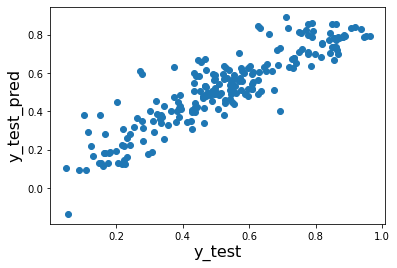

In [451]:
plt.figure()
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test', fontsize = 16)
plt.ylabel('y_test_pred', fontsize = 16)
plt.show()

In [452]:
round(lm_6.params,4)

const             0.1909
year              0.2341
holiday          -0.0963
temp              0.4777
windspeed        -0.1481
spring           -0.0554
summer            0.0621
winter            0.0945
sep               0.0910
Light_snowrain   -0.2850
Misty            -0.0787
dtype: float64

### We can see that the equation of our best fitted line is:

####  cnt =  0.1909 + 0.2341xyear - 0.0963xholiday + 0.4777xtemp -0.1481xwindspeed - 0.0554xspring + 0.0621xsummer + 0.0945xwinter + 0.0910xsep - 0.2850xLight_snowrain - 0.0787xMisty

In [457]:
# Calculating Adjusted-R^2 value for the test dataset

X_test_rfe.shape

(220, 10)

In [458]:
# finding sample size "n" and no. of independent variables "p"

n = X_test_rfe.shape[0]
n

220

In [459]:
p = X_test_rfe.shape[1]
p

10

In [461]:
adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
round(adjusted_r2,4)

0.7944

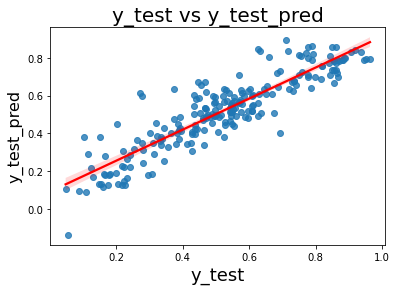

In [462]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x = y_test , y = y_test_pred , fit_reg=True , line_kws={"color": "red"})
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()

- The model is giving the accurate prediction as the graph between test data and predicted data is linear.

## Comparision between R^2 Training and Testing dataset:

- Train dataset R^2 : 0.833 (83.3 %)
- Test dataset R^2  : 0.8038 (80.38 %)

## Comparision between R^2 Adjusted Training and Testing dataset:

- Train dataset Adjusted R^2 : 0.829 (82.9%)
- Test dataset Adjusted R^2  : 0.7944 (79.44%)